In [ ]:
# Loading and Exploring The Data
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/Airlines.csv')

In [ ]:
# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (539383, 9)

Column names: ['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time', 'Length', 'Delay']

First 5 rows:


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [ ]:
# Missing Values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64


In [ ]:
# Data Types
print("\nBasic statistics:")
df.describe()


Basic statistics:


,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [ ]:
# Visualization

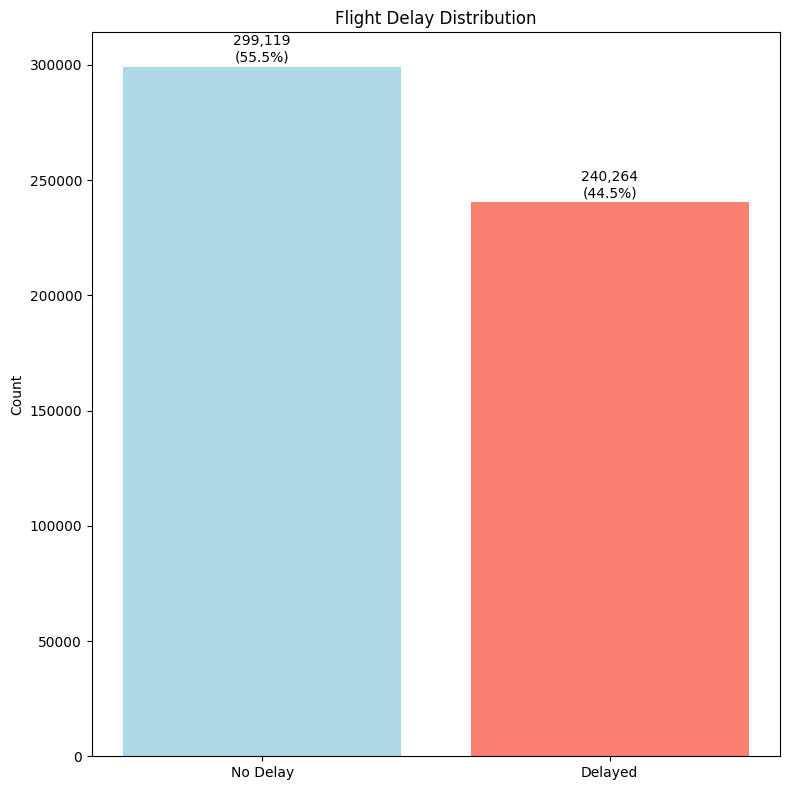

Overall delay rate: 44.54%
No delay rate: 55.46%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart
plt.figure(figsize=(8, 8))

delay_counts = df['Delay'].value_counts()
delay_percentages = df['Delay'].value_counts(normalize=True) * 100

plt.bar(['No Delay', 'Delayed'], delay_counts.values, color=['lightblue', 'salmon'])
plt.title('Flight Delay Distribution')
plt.ylabel('Count')

for i, (count, percentage) in enumerate(zip(delay_counts.values, delay_percentages.values)):
    plt.text(i, count + 1000, f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Overall delay rate: {df['Delay'].mean():.2%}")
print(f"No delay rate: {(1-df['Delay'].mean()):.2%}")

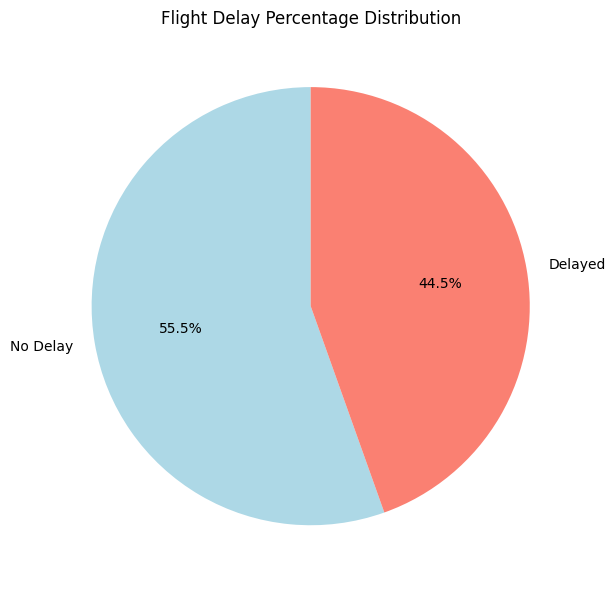

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 6))

delay_counts = df['Delay'].value_counts()
plt.pie(delay_counts.values, labels=['No Delay', 'Delayed'], autopct='%1.1f%%',
        colors=['lightblue', 'salmon'], startangle=90)
plt.title('Flight Delay Percentage Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Data Preprocessing and Cleaning

In [ ]:
print("Missing values before cleaning:")
print(df.isnull().sum())

df_clean = df.dropna()

df_clean = df_clean.drop_duplicates()

print(f"\nDataset shape after cleaning: {df_clean.shape}")
print(f"Removed {len(df) - len(df_clean)} rows")

print(f"\nUnique Airlines: {df_clean['Airline'].nunique()}")
print(f"Airlines: {df_clean['Airline'].unique()}")
print(f"\nDay of Week range: {df_clean['DayOfWeek'].min()} to {df_clean['DayOfWeek'].max()}")
print(f"Time range: {df_clean['Time'].min()} to {df_clean['Time'].max()}")

Missing values before cleaning:
id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

Dataset shape after cleaning: (539383, 9)
Removed 0 rows

Unique Airlines: 18
Airlines: ['CO' 'US' 'AA' 'AS' 'DL' 'B6' 'HA' 'OO' '9E' 'OH' 'EV' 'XE' 'YV' 'UA'
 'MQ' 'FL' 'F9' 'WN']

Day of Week range: 1 to 7
Time range: 10 to 1439


In [ ]:
# Extract Time-Based Features

In [ ]:
df_clean['Hour'] = (df_clean['Time'] // 60).astype(int)
df_clean['Minute'] = (df_clean['Time'] % 60).astype(int)

def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_clean['TimePeriod'] = df_clean['Hour'].apply(get_time_period)

df_clean['DayType'] = df_clean['DayOfWeek'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')

print("Time-based features created:")
print(f"Hour range: {df_clean['Hour'].min()} to {df_clean['Hour'].max()}")
print(f"Time periods: {df_clean['TimePeriod'].unique()}")
print(f"Day types: {df_clean['DayType'].unique()}")

Time-based features created:
Hour range: 0 to 23
Time periods: ['Night' 'Morning' 'Afternoon' 'Evening']
Day types: ['Weekday' 'Weekend']
